# Monte Carlo

Aquí en este documento se verán cuatro variantes del método de Monte Carlo y se van a comparar con respecto a su varianza para ver cuál es el que tiene la mínima varianza.

Para ilustrar el funcionamiento de estos métodos, se resolverá esta integral.

$$\int_{0}^{1}\dfrac{e^x-1}{e-1}dx$$

# Monte Carlo estratificado

El siguiente código solo sirve para una variable aleatoria uniforme. $X \sim U(0,1)$

Primero se van a importar las librerías que se van a ocupar para este método.

In [ ]:
from math import *
from random import random

Definimos la función.

In [ ]:
f = lambda x : (exp(x)-1)/(e-1)

$N$ Será la cantidad de números aleatorios que se van a generar y $M$ el número de intervalos en que se va a dividir el intervalo. $[0,1]$

In [ ]:
N = 20
m = 4

Estos son los U sub k sub i

In [ ]:
def u(a,b,n):
	l = ((b-a)*random()+a for i in range(n))
	return l

Theta que en este caso se va a definir como estimador.

In [50]:
def estratificado(M,N):
	s = 0
	for j in range(M):
		s+=sum([f(k) for k in u(j*(1/M),(j+1)*(1/M),N)])
	return s/(M*N)

Se el resultado estimado y el resultado original.

In [51]:
print(estratificado(4,20))
print(1-1/(e-1))

3.5297432782551668
0.41802329313067355


# Monte Carlo muestreo importancia

Primero empezamos importando las librerías.

In [31]:
from random import random
from math import *
import numpy as np
import matplotlib.pyplot as plt

Ahora definimos la función a la cual se le desea calcular la integral y la función que se le parece.

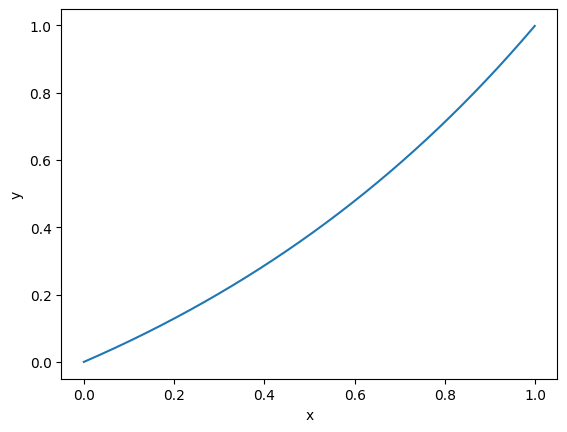

In [32]:
f1 = lambda x : (np.exp(x)-1)/(e-1)

t = np.arange(0,1,0.001)
plt.plot(t,f1(t))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

La funcion que se propone es la siguiente.

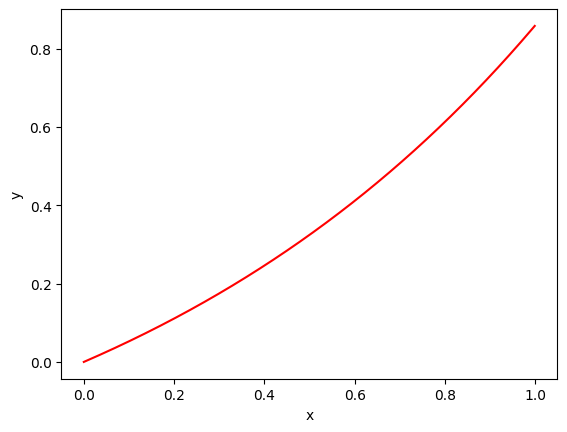

In [33]:
f2 = lambda x: 0.5*np.exp(t)-0.5

plt.plot(t,f2(t),c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Graficando ambas funciones para compararlas.

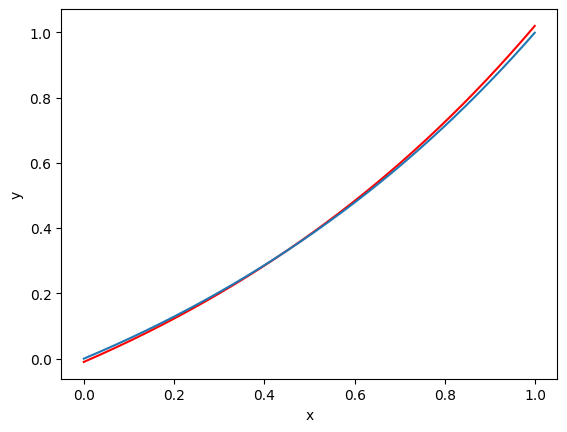

In [44]:
f1 = lambda x : (np.exp(x)-1)/(e-1)
f2 = lambda x: 0.6*np.exp(t)-0.61

t = np.arange(0,1,0.001)
plt.plot(t,f2(t),c="red")
plt.plot(t,f1(t))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Definimos la funcion estimador.

In [48]:
f = lambda x : (exp(x)-1)/(e-1)

g = lambda x : 0.6*exp(x)-0.61


def estimador(a,b,n):
	u = (b-a)*random()+a
	l = (g(u)/f(u) for i in range(n))
	return sum(l)/n

print(estimador(0,1,1000000))

0.9629689516736184


# Monte Carlo media muestral


Primero importamos las librerías que se van a usar para este método.

In [ ]:
from random import random
from math import *

Se define la función a integrar.

In [ ]:
f = lambda x : (exp(x)-1)/(e-1)

Por último, se define una función que ejecuta el método de media muestral.

Se genera una lista de números aleatorios dentro del intervalo donde se desea calcular la integral definida, en este caso el intervalo de integración es de $[0,1]$ y se van a generar números aleatorios que estén dentro de este intervalo.

La función ```media(a,b,N)``` tiene tres parámetros que son:


*   ```a```: Limite inferior.
*   ```b```: Limite superior.
*   ```N```: Cantidad de números aleatorios a generar.

Lo que regresa la función es la aproximación de la integral.

O sea:

$$\theta=\dfrac{(b-a)}{N}\sum_{i=1}^{n}g(X_i)$$

In [ ]:
def media(a,b,N):
  l = (f((b-a)*random()+a) for i in range(N))  # Generador que evalua los numeros aleatorios en la funcion f
  return (b-a)*(sum(l)/N)

Por último, le pasamos los parámetros ```a=0 b=1``` y aproximamos la integral con un millón de números aleatorios. ```N=1000000```

In [29]:
print(media(0,1,1000000))

0.4183863104720596


# Monte Carlo acierto y error.

Importamos las librerías.

In [49]:
from random import random
from math import *
import numpy as np
import matplotlib.pyplot as plt